# Simple Linear Regression

# Using the same code as before, please solve the following exercises
    1. Change the number of observations to 100,000 and see what happens.
    2. Change the number of observations to 1,000,000 and see what happens.
    3. Play around with the learning rate. Values like 0.0001, 0.001, 0.1, 1 are all interesting to observe. 
    4. Change the loss function. L2-norm loss (without dividing by 2) is a good way to start. 
    5. Тry with the L1-norm loss, given by the sum of the ABSOLUTE value of yj - tj. The L1-norm loss is given by:
## $$ \Sigma_i = |y_i-t_i| $$
    6. Create a function f(x,z) = 13*xs + 7*zs - 12. Does the algorithm work in the same way?
    
    
Useful tip: When you change something, don't forget to RERUN all cells. This can be done easily by clicking:
Kernel -> Restart & Run All
If you don't do that, your algorithm will keep the OLD values of all parameters.

You can either use this file for all the exercises, or check the solutions of EACH ONE of them in the separate files we have provided. All other files are solutions of each problem. If you feel confident enough, you can simply change values in this file. Please note that it will be nice, if you return the file to starting position after you have solved a problem, so you can use the lecture as a basis for comparison.

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Generate random input data to train on

In [2]:
observations = 1000
xs = np.random.uniform(low = -10, high = 10, size = (observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))
inputs = np.column_stack((xs, zs))
print(inputs.shape)

(1000, 2)


## Generate the targets we will aim at

In [3]:
noise = np.random.uniform(-1, 1, (observations, 1))
targets = 13*xs + 7*zs - 12 + noise
print(targets.shape)

(1000, 1)


## Plot the training data

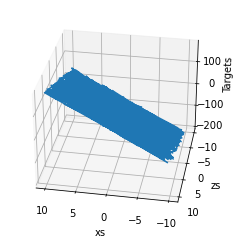

In [4]:
targets = targets.reshape(observations, )
xs = xs.reshape(observations, )
zs = zs.reshape(observations, )

fig = plt.figure()

ax = fig.add_subplot(111, projection = '3d')
ax.plot(xs, zs, targets)

ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

ax.view_init(azim = 100)

#plt.rcParams['agg.path.chunksize'] = 10000
plt.show()
targets = targets.reshape(observations, 1)
xs = xs.reshape(observations, 1)
zs = zs.reshape(observations, 1)

## Initialize variables

In [5]:
init_range = 0.1
weights = np.random.uniform(-init_range, init_range, (2, 1))
biases = np.random.uniform(-init_range, init_range, 1)
print(weights)
print(biases)

[[0.07270198]
 [0.05173508]]
[0.00046854]


## Set a learning rate

In [6]:
learning_rate = 0.02

## Train the model

In [7]:
for i in range (100):
    
    outputs = np.dot(inputs,weights) + biases

    deltas = outputs - targets
        
    loss = np.sum(deltas ** 2) / 2 / observations
    #loss = np.sum(deltas)/observations
    
    print (loss)
    
    deltas_scaled = deltas / observations
    
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

3670.5249113038353
456.65479574831596
108.69125734555104
68.53590462036114
61.891084469214505
59.01583230865498
56.644146499195934
54.40998167748206
52.268981538816035
50.21303691032574
48.23828076394727
46.34145007734688
44.519463141111586
42.76936602727969
41.08832209578188
39.47360671937687
37.922602786453325
36.43279644945117
35.00177304925838
33.62721320141664
32.30688903687495
31.038660591085584
29.820472335576742
28.650349846377964
27.526396603899173
26.446790919075873
25.409782980798788
24.41369201984237
23.456903584695368
22.53786692487866
21.655092477508493
20.80714945303203
19.992663516222006
19.210314558671534
18.458834559179483
17.737005528557763
17.04365753552999
16.377666810521944
15.737953924270068
15.123482038296338
14.533255224413676
13.966316850538337
13.42174803019273
12.898666133186046
12.396223355058424
11.913605342970436
11.450029875810255
11.004745596379731
10.577030793604317
10.166192232792794
9.771564032051508
9.39250658303142
9.028405514259047
8.6786706953710

## Print weights and biases and see if we have worked correctly

In [8]:
print(weights, biases)

[[13.00230686]
 [ 6.98140982]] [-10.36177427]


## Plot last outputs vs targets

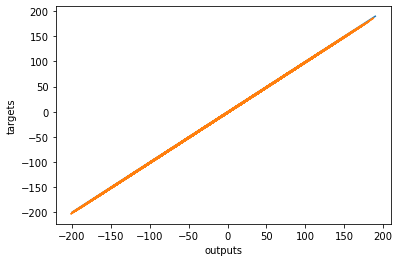

In [9]:
# A x = y graph to compare
y = np.arange(-200, 200, 10)
x = y
plt.plot(x,y)

# The outputs x targets plot
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
#plt.rcParams['agg.path.chunksize'] = 10000
plt.show()